In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
# Check data types and null values
df.info()

# Check for blanks represented as empty strings
df.replace(" ", pd.NA, inplace=True)
df.isnull().sum()


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

Univariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].hist(bins=30, figsize=(12, 5))
plt.tight_layout()


Bivariate Analysis

In [ ]:
for col in cat_cols:
    if col != 'customerID':
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f'{col} vs Churn')
        plt.xticks(rotation=45)
        plt.show()


In [ ]:
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


Checking Class Imbalance


In [ ]:
df['Churn'].value_counts(normalize=True) * 100


In [ ]:
sns.barplot(x = df['Churn'], y = df['MonthlyCharges'])

In [ ]:
sns.barplot(x=df['Churn'], y = df['PaymentMethod'])

Tenure Grouping


In [41]:
#df = df[df['Churn'] == 'Yes']

def tenure_grouping(tenure):
    if tenure <= 6:
        return '0-6 months'
    elif tenure <= 12:
        return '6-12 months'
    elif tenure <= 24:
        return '1-2 years'
    elif tenure <= 48:
        return '2-4 years'
    elif tenure <= 60:
        return '4-5 years'
    else:
        return '5+ years'

df.loc[:,'TenureGroup'] = df['tenure'].apply(tenure_grouping)


In [ ]:
df

In [43]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

df.loc[:, 'NumServices'] = df[services].apply(lambda row: sum(row == 'Yes'), axis=1)

In [45]:
df.loc[:, 'IsFamily'] = ((df['Partner'] == 'Yes') | (df['Dependents'] == 'Yes')).astype(int)


Ordinal Encoding

In [47]:
df.loc[:, 'ContractRisk'] = df['Contract'].map({
    'Month-to-month': 3,
    'One year': 2,
    'Two year': 1
})


In [48]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['ChargeRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)


<ipython-input-48-bed9f208ddce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
<ipython-input-48-bed9f208ddce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ChargeRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)


In [49]:
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in yes_no_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


<ipython-input-49-05797905ec0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': 1, 'No': 0})
<ipython-input-49-05797905ec0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'Yes': 1, 'No': 0})
<ipython-input-49-05797905ec0c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [50]:
df.loc[:, 'PaymentRisk'] = df['PaymentMethod'].apply(lambda x: 1 if 'electronic check' in x.lower() else 0)


<ipython-input-50-a1dd88c33530>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'PaymentRisk'] = df['PaymentMethod'].apply(lambda x: 1 if 'electronic check' in x.lower() else 0)


> One Hot Encoding Categorical Columns

In [51]:
cat_cols = ['InternetService', 'Contract', 'PaymentMethod', 'TenureGroup']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [52]:
gender_map = {'Male':0,'Female':1}

df['gender'] = df['gender'].map(gender_map)

In [53]:
df['Churn'].unique()

array([0, 1])

In [54]:
multi_line_map = {'Yes':1, 'No':0,'No phone service':0}

df['MultipleLines'] = df['MultipleLines'].map(multi_line_map)

In [55]:
Online_secu_map = {'Yes':1, 'No':0,'No internet service':0}

df['OnlineSecurity'] = df['OnlineSecurity'].map(Online_secu_map)
df['OnlineBackup'] = df['OnlineBackup'].map(Online_secu_map)
df['DeviceProtection'] = df['DeviceProtection'].map(Online_secu_map)
df['TechSupport'] = df['TechSupport'].map(Online_secu_map)
df['StreamingTV'] = df['StreamingTV'].map(Online_secu_map)
df['StreamingMovies'] = df['StreamingMovies'].map(Online_secu_map)

In [56]:
df.isnull().sum().sort_values(ascending=False).head(10)


customerID                               0
Contract_Two year                        0
ContractRisk                             0
ChargeRatio                              0
PaymentRisk                              0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
PaymentMethod_Credit card (automatic)    0
NumServices                              0
dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#The stratify makes the random split in equal proportion as how the orignal data was

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]


In [59]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


[[728 305]
 [ 72 302]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.50      0.81      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.71      1407
weighted avg       0.80      0.73      0.75      1407

ROC AUC Score: 0.8401170465546071


Using Advanced Classification Models

> Random Forest Classification

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}


In [62]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,  # Try more for deeper search
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         'balanced_subsample'],
                                        'max_depth': [6, 8, 10, 12, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [63]:
best_rf = random_search.best_estimator_

y_pred1 = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Best Random Forest Performance:")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Optional: Check best hyperparameters
print("Best Parameters:", random_search.best_params_)


Best Random Forest Performance:
[[755 278]
 [ 81 293]]
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.78      0.62       374

    accuracy                           0.74      1407
   macro avg       0.71      0.76      0.71      1407
weighted avg       0.80      0.74      0.76      1407

ROC AUC Score: 0.8380605784512167
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 8, 'class_weight': 'balanced_subsample'}


In [64]:
import joblib

# Save model to file
joblib.dump(best_rf, 'Random_Forest_Churn_model.pkl')


['Random_Forest_Churn_model.pkl']

> XG Boost Classification

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=2.75,  # balancing positive class (based on 26.5% churn rate)
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)[:, 1]


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=2.75,
    random_state=42
)

param_grid_XG = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.2, 0.4],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2]
}


In [67]:
search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_XG,
    n_iter=30,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42
)

search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [68]:
best_xgb = search.best_estimator_

y_pred2 = best_xgb.predict(X_test)
y_proba2 = best_xgb.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Tuned XGBoost Results:")
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba2))
print("Best Params:", search.best_params_)


Tuned XGBoost Results:
[[725 308]
 [ 75 299]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

ROC AUC Score: 0.8402011689125181
Best Params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [69]:
import joblib

# Save model to file
joblib.dump(best_xgb, 'XGB_Churn_model.pkl')


['XGB_Churn_model.pkl']

> SHAP Analysis

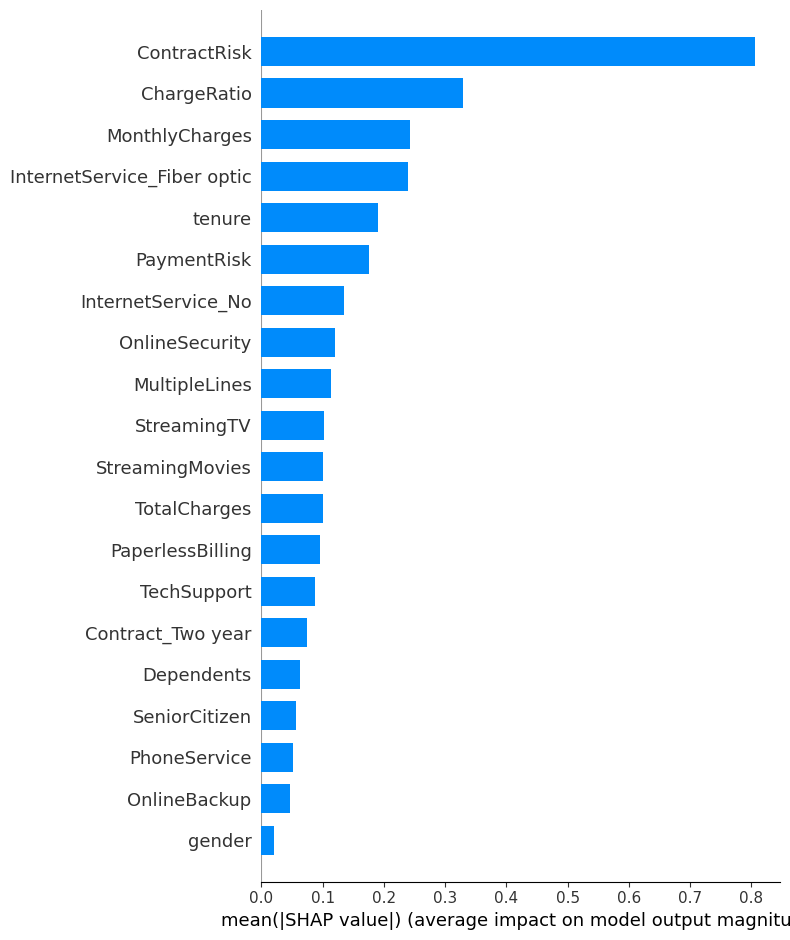

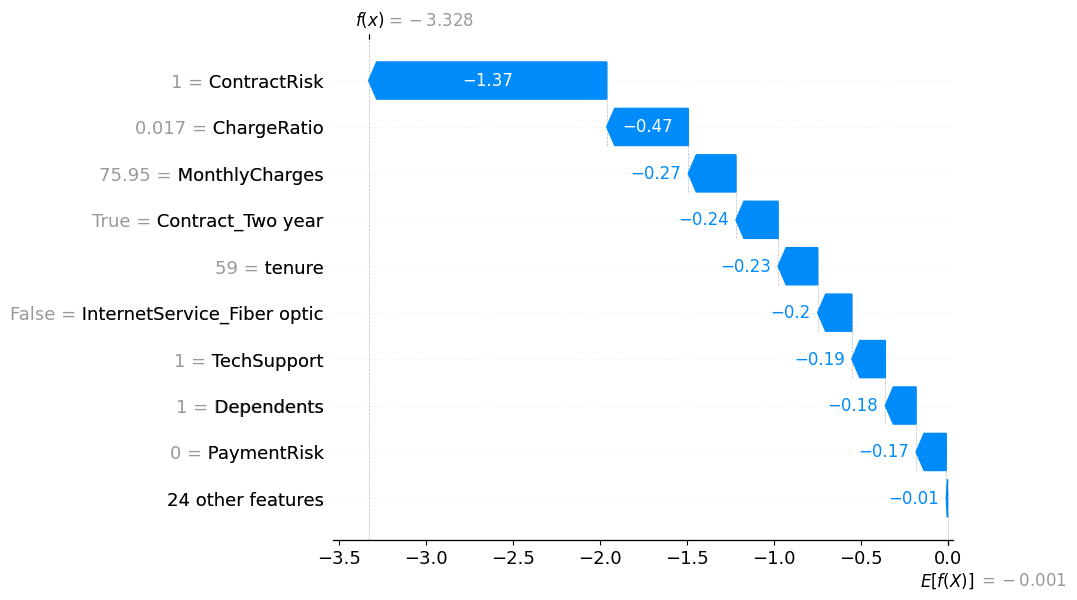

In [72]:
import shap

explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

# Summary plot (most important features)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Optional: Detailed plot for a few customers
shap.plots.waterfall(shap_values[0])
shap.plots.force(shap_values[1])
